# Description: This program uses an artificial recurrent neural network called Long Short Term Memory(LSTM) to predict the closing stock price using past 60 day stock price.

In [1]:
import math
import numpy as np
import pandas as pd
import pandas_datareader as web
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import date
plt.style.use('fivethirtyeight')

C:\Users\bandi\.conda\envs\pythonml\lib\site-packages\pandas_datareader\compat\__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [2]:
ticker = 'AAPL'

In [3]:
#Get stock quote

df=web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end=date.today())    #YYYY-MM-DD
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,58.928570,58.428570,58.485714,58.747143,75555200.0,50.857235
2012-01-04,59.240002,58.468571,58.571430,59.062859,65005500.0,51.130558
2012-01-05,59.792858,58.952858,59.278572,59.718571,67817400.0,51.698215
2012-01-06,60.392857,59.888573,59.967144,60.342857,79573200.0,52.238651
2012-01-09,61.107143,60.192856,60.785713,60.247143,98506100.0,52.155792
...,...,...,...,...,...,...
2020-06-10,354.769989,346.089996,347.899994,352.839996,41662900.0,352.839996
2020-06-11,351.059998,335.480011,349.309998,335.899994,50415600.0,335.899994
2020-06-12,347.799988,334.220001,344.720001,338.799988,50001500.0,338.799988


In [4]:
df.shape

(2127, 6)

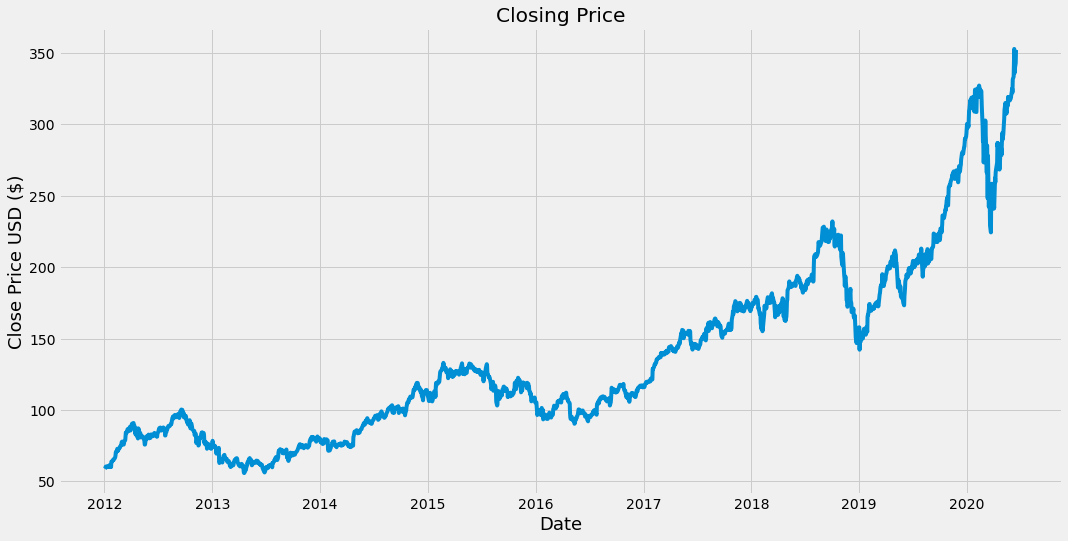

In [5]:
plt.figure(figsize=(16,8))
plt.title('Closing Price')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [6]:
data=df.filter(['Close'])

#Convert to np array
dataset=data.values

#Get the number of rows to train the model on
#math.ceil to round up 

training_data_len = math.ceil(len(dataset)*.8)


#print(dataset)
training_data_len

1702

In [7]:
#Scale the data

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00995503],
       [0.01101787],
       [0.01322528],
       ...,
       [0.9527352 ],
       [0.96684058],
       [0.99744148]])

In [8]:
#Create training dataset
#Create scaled training dataset

train_data = scaled_data[0:training_data_len,:]

#Split the data into x_train and y_train data set

x_train=[]
y_train=[]

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=60:
        print(x_train)
        print(y_train)
        print()

[array([0.00995503, 0.01101787, 0.01322528, 0.0153269 , 0.01500469,
       0.01573087, 0.01539904, 0.01484117, 0.01408132, 0.01643302,
       0.01855388, 0.01789982, 0.01431697, 0.01773631, 0.01436987,
       0.02699401, 0.02601774, 0.02729218, 0.03004785, 0.03171663,
       0.03157717, 0.03106259, 0.03325558, 0.03531872, 0.037656  ,
       0.04143122, 0.04936158, 0.04948181, 0.05389666, 0.05719575,
       0.0515257 , 0.05370909, 0.05366581, 0.05978792, 0.05891744,
       0.06052852, 0.06342365, 0.06503475, 0.06967562, 0.07305649,
       0.07403274, 0.07437421, 0.06859356, 0.06719888, 0.06740568,
       0.07284006, 0.0743694 , 0.07765406, 0.08539688, 0.09572703,
       0.09379373, 0.09379853, 0.10126722, 0.10360448, 0.1019405 ,
       0.10042081, 0.09883858, 0.10409502, 0.10770193, 0.10921202])]
[0.10548007307678448]



In [9]:
#convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#Reshape the data into 3 dimensional
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1642, 60, 1)

In [11]:
#Build LSTM model
model=Sequential()
#Add first layer to model
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
#Add second layer to model
model.add(LSTM(50, return_sequences=False))
#Add Dense Layer to model with 25 neurons
model.add(Dense(25))
#Add Dense Layer to model with 1 neuron
model.add(Dense(1))

In [12]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')



In [13]:
#Train the model
model.fit(x_train, y_train, batch_size=1,epochs=3)

Epoch 1/3
1642/1642 [==============================] - 49s 30ms/step - loss: 5.6344e-04
Epoch 2/3
1642/1642 [==============================] - 49s 30ms/step - loss: 2.3566e-04
Epoch 3/3
1642/1642 [==============================] - 49s 30ms/step - loss: 1.6623e-04


In [14]:
#Create the test data set
#Create a new array containing scaled values

test_data=scaled_data[training_data_len-60: , : ]
#Create the data sets x_test and y_test

x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i,0])
    


In [15]:
#Convert the data to a numpy array

x_test=np.array(x_test)


In [16]:
#Reshape the data to 3d
x_test=np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))


In [17]:
#Get the models predicted price values

predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)


In [18]:
#Get root mean squared error(RMSE)

rmse =np.sqrt(np.mean(predictions-y_test)**2)
rmse



7.068117891199448

C:\Users\bandi\.conda\envs\pythonml\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


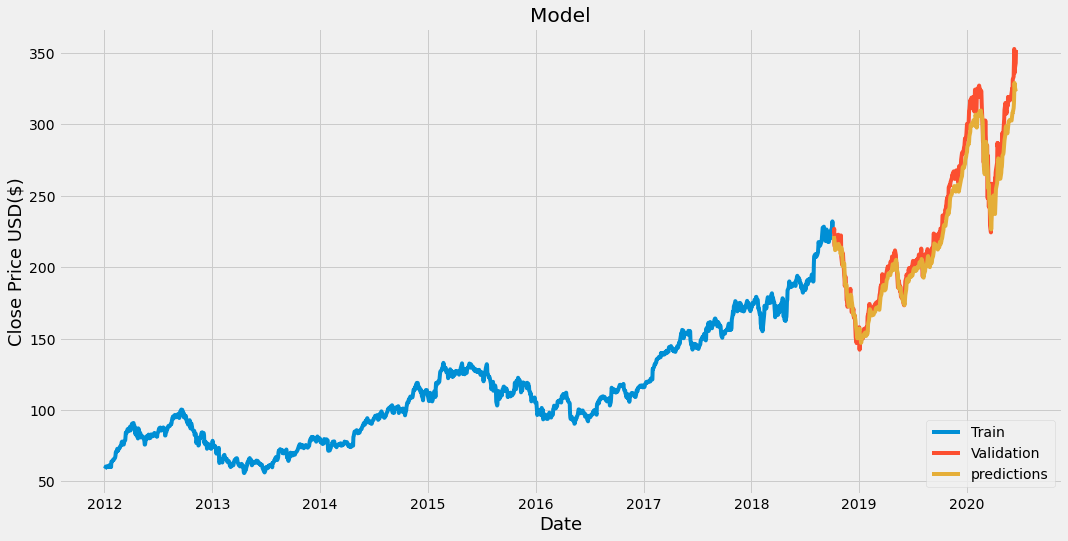

In [19]:
#plot the data

train=data[:training_data_len]
valid=data[training_data_len:]
valid['predictions'] = predictions

#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'predictions']])
plt.legend(['Train','Validation', 'predictions'], loc='lower right')
plt.savefig('Images/prediction.png')
plt.show()

In [20]:
#Show the valid and predicted prices

valid.tail(15)

,Close,predictions
Date,,
2020-05-27,318.109985,302.794434
2020-05-28,318.250000,302.726501
2020-05-29,317.940002,302.769073
2020-06-01,321.850006,302.698151
2020-06-02,323.339996,304.304962
2020-06-03,325.119995,306.260193
2020-06-04,322.320007,308.234467
2020-06-05,331.500000,308.142365
2020-06-08,333.459991,311.437958


In [21]:
#Get the quote
stock_quote = web.DataReader(ticker, data_source='yahoo', start='2012-01-01', end=date.today())

new_df=stock_quote.filter(['Close'])
#Get last 60 days values and convert into array
last_60_days=new_df[-60:].values

#Scale the data to be values between 0
last_60_days_scaled=scaler.transform(last_60_days)

#Create an empty list
X_test=[]
#Appemd the past 60days
X_test.append(last_60_days_scaled)

#Conver the X_test data into numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1],1))
#Get predicted scaled price
pred_price = model.predict(X_test)
#undo the scaling
pred_price=scaler.inverse_transform(pred_price)
print(f'Price of {ticker} tomorrow:{pred_price}')

Price of AAPL tomorrow:[[327.12445]]
